# The Agents of FloAI

This notebook shows different kinds of agents that can be built using flo-ai. These agents have their own specialities, and this notebook tries to explain them.

Here are the major types of agents:

1. Agentic Agents (`kind: agentic`): Any agent created in flo-ai by default tries to be an agentic agent. This agent always needs a tool, meaning an agent without a tool if specified as agentic agent whill throw an exception

2. LLM Agents (`kind: llm`): These agents are simply an LLM which can answer any questions asked to it. The agents dont except tools. If tool is passed to an agent of type llm, they are ignored.

3. Tool Agents (`kind: tool`): These agents are just tools or functions that can be executed on the current state. Within the tool will be given the current state as the input, meaning the history of what happened in the flo until now

4. Reflection Agents (`kind: reflection`): These agents can help in reflecting on the current answer and retrying an exisitng flow. This is useful when you want to re-evaluate an answer with better model for example.

5. Delegator Agent (`kind: delegator`): These agents can delegate to any other agent with the workflow based on a prompt. For example you want to delegate to different agents based on the user question

In [1]:
from flo_ai import Flo
from flo_ai import FloSession
from flo_ai.common.flo_logger import get_logger
from flo_ai.common.flo_langchain_logger import FloLangchainLogger
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

from dotenv import load_dotenv
load_dotenv()

True

## Setup
Create the Flo session, setup tools

In [2]:
from langchain_community.tools.tavily_search.tool import TavilySearchResults
from flo_ai.common.flo_langchain_logger import FloLangchainLogger

llm = ChatOpenAI(temperature=0, model_name='gpt-4o-mini')

session = FloSession(
    llm
)

session.register_tool(
    name="InternetSearchTool", 
    tool=TavilySearchResults()
)

## Agentic Agent (agentic)

Here we are gonna create a simple weather assitant flo agent that can check the whether by an internet searching tool.

As you can see the kind is `agentic`

In [3]:
simple_weather_checking_agent = """
apiVersion: flo/alpha-v1
kind: FloAgent
name: weather-assistant
agent:
    name: WeatherAssistant
    kind: agentic
    job: >
      Given the city name you are capable of answering the latest whether this time of the year by searching the internet
    tools:
      - name: InternetSearchTool
"""

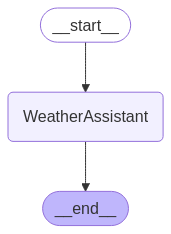

In [4]:
from IPython.display import Image, display
flo = Flo.build(session, simple_weather_checking_agent)

flo.draw(xray=True)

In [5]:
result = flo.invoke("Whats the whether in New Delhi, India ?")
print(result)

{'messages': [HumanMessage(content='Whats the whether in New Delhi, India ?', additional_kwargs={}, response_metadata={}), HumanMessage(content='As of now, the weather in New Delhi, India is as follows:\n\n- **Temperature**: 32.2°C (90°F)\n- **Condition**: Mist\n- **Humidity**: 46%\n- **Wind**: 9.2 mph (14.8 kph) from the WSW\n- **Visibility**: 4 km\n- **Feels Like**: 30°C (86°F)\n\nFor more detailed forecasts and updates, you can check [Weather API](https://www.weatherapi.com/) or [World Weather Info](https://world-weather.info/forecast/india/delhi/october-2023/).', additional_kwargs={}, response_metadata={}, name='WeatherAssistant')]}


Lets create the same agent but using code

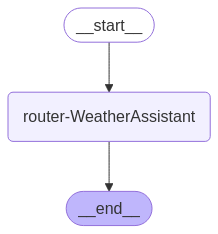

{'messages': [HumanMessage(content='Whats the whether in New Delhi, India ?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='As of now, the weather in New Delhi, India is as follows:\n\n- **Temperature**: 32.2°C (90°F)\n- **Condition**: Mist\n- **Wind**: 9.2 mph (14.8 kph) from the WSW\n- **Humidity**: 46%\n- **Visibility**: 4 km\n- **Feels Like**: 30°C (86°F)\n\nFor more detailed forecasts and updates, you can check [Weather API](https://www.weatherapi.com/) or [World Weather Info](https://world-weather.info/forecast/india/delhi/october-2023/).', additional_kwargs={}, response_metadata={}, name='WeatherAssistant')]}

In [5]:
from flo_ai import FloAgent

weather_agent = FloAgent.create(
    session=session,
    name="WeatherAssistant",
    job="Given the city name you are capable of answering the latest whether this time of the year by searching the internet",
    tools=[TavilySearchResults()]
)

agent_flo: Flo = Flo.create(session, weather_agent)
agent_flo.draw(xray=False)

agent_flo.invoke("Whats the whether in New Delhi, India ?")

## LLM Agent (llm)

Here we are gonna create a simple llm math assitant flo agent that can check answer any math question

As you can see the kind is `llm`

In [6]:
simple_llm_agent = """
apiVersion: flo/alpha-v1
kind: FloAgent
name: llm-assistant
agent:
    name: ask-llm-anything
    kind: llm
    job: >
      You are a high school maths teacher. Answer any questions the students ask 
"""

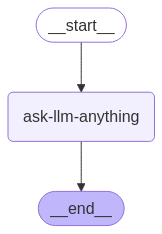

In [7]:
flo = Flo.build(session, simple_llm_agent)

flo.draw(xray=True)

In [11]:
flo.invoke("What is pythagorus theorum, just give me the formula")

{}
---------g------


{'messages': [HumanMessage(content='What is pythagorus theorum, just give me the formula', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='The Pythagorean theorem states that in a right triangle, the square of the length of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the lengths of the other two sides. The formula is:\n\n\\( a^2 + b^2 = c^2 \\)\n\nwhere \\( c \\) is the length of the hypotenuse, and \\( a \\) and \\( b \\) are the lengths of the other two sides.', additional_kwargs={}, response_metadata={}, name='ask-llm-anything')]}

Code implementation

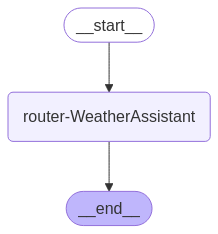

{}
---------g------


{'messages': [HumanMessage(content='What is pythagorus theorum, just give me the formula', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='The Pythagorean theorem states that in a right triangle, the square of the length of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the lengths of the other two sides. The formula is:\n\n\\[ c^2 = a^2 + b^2 \\]\n\nwhere \\( c \\) is the length of the hypotenuse, and \\( a \\) and \\( b \\) are the lengths of the other two sides.', additional_kwargs={}, response_metadata={}, name='WeatherAssistant')]}

In [12]:
from flo_ai import FloLLMAgent

simple_llm_agent = FloLLMAgent.create(
    session=session,
    name="WeatherAssistant",
    job="You are a high school maths teacher. Answer any questions the students ask ",
)

agent_flo: Flo = Flo.create(session, simple_llm_agent)
agent_flo.draw()

agent_flo.invoke("What is pythagorus theorum, just give me the formula")

# Tool Agent (tool)

Lets create a simple tool agent, which has just a tool and nothing else. The tool agent just executes a tool and nothing else. The tool can invoke llms within if in needs to

#

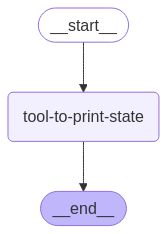

In [8]:
from flo_ai.tools import flotool
from langchain.tools import BaseTool

@flotool("print_tool", "To print the state")
def print_state(**kwargs):
    print(kwargs)
    return "Print tool call success"
    
session.register_tool(
    name="printStateTool", 
    tool=print_state
)
    
simple_tool_agent = """
apiVersion: flo/alpha-v1
kind: FloAgent
name: llm-tool
agent:
    name: tool-to-print-state
    kind: tool
    tools:
        - name: printStateTool
"""

flo = Flo.build(session, simple_tool_agent)

flo.draw()

In [9]:
print(flo.invoke("Print what I am saying"))

{}
{'messages': [HumanMessage(content='Print what I am saying', additional_kwargs={}, response_metadata={}), HumanMessage(content='Print tool call success', additional_kwargs={}, response_metadata={}, name='tool-to-print-state')]}


Building with code

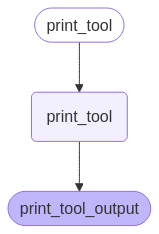

{}
Print tool call success


In [14]:
from flo_ai import FloToolAgent

simple_tool_agent = FloToolAgent.create(
    session=session,
    name="llm-tool",
    tool=print_state
)

agent_flo: Flo = Flo.create(session, simple_tool_agent)
agent_flo.draw()

print(flo.invoke("Print what I am saying"))

# Reflection Agent (reflection)
These agents help evaluate a work based on certain criteria. In the graph you can see flo has automatically added reflection manager to handle retries and its count.

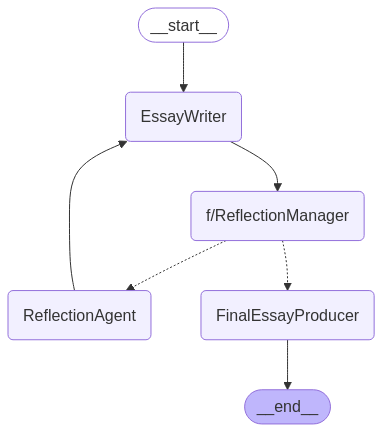

In [10]:
yaml_data = """
apiVersion: flo/alpha-v1
kind: FloRoutedTeam
name: adding-team
team:
    name: EssayTeam
    agents:
      - name: EssayWriter
        kind: llm
        job: >
          You are an essay assistant tasked with writing excellent 300-words essays. Generate the best essay possible for the user's request. 
          If the you are provided critique view, respond with a revised version of your previous attempts. A maximum of total 100 words
      - name: ReflectionAgent
        kind: reflection
        retry: 1
        to: 
          - name: EssayWriter
        job: >
          You are a teacher grading an essay submission. Generate critique and recommendations for the user's submission.
          Provide detailed recommendations, including requests for length, depth, style, etc.
      - name: FinalEssayProducer
        kind: llm
        job: >
          Generate the final assay to be returned to the user
    router:
      name: router
      kind: linear
"""

input_prompt = """
Question: Write me an interesting blog about latest advancements in agentic AI by reasearching the internet
"""

llm = ChatOpenAI(temperature=0, model_name='gpt-4o-mini')
session = FloSession(llm).register_tool(
    name="TavilySearchResults", 
    tool=TavilySearchResults()
)

flo: Flo = Flo.build(session, yaml=yaml_data)
flo.draw()

# Delegator Agent (delegator)

Using these agents you can do redirects, this can help redirecting calls as well as retrying previous steps

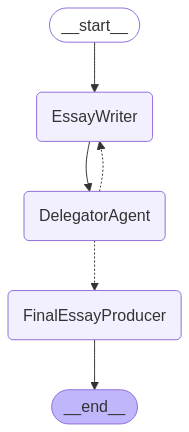

In [11]:
yaml_data = """
apiVersion: flo/alpha-v1
kind: FloRoutedTeam
name: adding-team
team:
    name: EssayTeam
    agents:
      - name: EssayWriter
        kind: llm
        job: >
          You are an essay assistant tasked with writing excellent 300 words essay. Generate the best essay possible for the user's request. 
          If the you are provided critique view, respond with a revised version of your previous attempts. A maximum of total 100 words
      - name: DelegatorAgent
        kind: delegator
        retry: 1
        to: 
          - name: EssayWriter
        job: >
          You are a teacher grading an essay submission. Score the essay between 1 to 10, with 10 being perfect
          If the score is greater than 7 sent it to FinalEssayProducer
          else if its less than or equal to 7 sent it to EssayWriter with suggestions to change
      - name: FinalEssayProducer
        kind: llm
        job: >
          Generate the final assay to be returned to the user
    router:
      name: router
      kind: linear
"""

input_prompt = """
Question: Write me an interesting blog about latest advancements in agentic AI by reasearching the internet
"""

llm = ChatOpenAI(temperature=0, model_name='gpt-4o-mini')
session = FloSession(llm)

flo: Flo = Flo.build(session, yaml=yaml_data)
flo.draw()
# data = flo.invoke(input_prompt)
# print((data['messages'][-1]).content)